In [1]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [2]:
Va, Vgr, Vbr, K, betta, I0, Ra, Rl, Pg = symbols("V_a V_{gr} V_{br} K \\beta I0 R_a R_l P_g", positive=True)
W, Pdiss, Q0, omega0, eta, Prefl, Ql, taul = symbols("W P_{diss} Q0 \\omega_0 \\eta P_{refl} Q_l \\tau_l", positive=True)

In [3]:
I0num=1e-2            # Ток пучка
Q0num=1.31e9          # Собственная добротность
Ranum=302*Q0num       # Шунтовое сопротивление
Qlnum=1e5             # Нагруженная добротность
f=325e6               # Частота
omega0num=2*pi*f      # Угловая частота

# Оптимальные связь и подводимая мощность

In [4]:
b, betaopt, Vc, Pgopt = symbols("b \\beta_{opt} V_{c} P^{opt}_{g}", positive=True)

In [5]:
Vcnum=6.4e6*0.21*29979458/f      # Напряжённость в ячейке

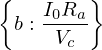

In [6]:
bb = {b: I0*Ra/Vc} # при правильно фазированном пучке
bb

In [7]:
bb[b].evalf(subs={I0:I0num, Ra:Ranum, Vc:Vcnum})

## $\beta_{opt}$

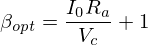

In [8]:
bettaopt = Eq(betaopt, abs(b+1)) # Без расстройки и микрофонных эффектов
bettaopt = bettaopt.subs(bb)
bettaopt

In [9]:
bettaoptnum = bettaopt.rhs.evalf(subs={I0:I0num, Ra:Ranum, Vc:Vcnum})
bettaoptnum

## $P^{opt}_g$

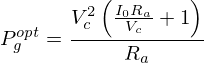

In [10]:
pgopt = Eq(Pgopt, Vc**2*bettaopt.rhs/Ra) # Без расстройки и микрофонных эффектов
pgopt

In [11]:
pgoptnm = pgopt.rhs.evalf(subs={I0:I0num, Ra:Ranum, Vc:Vcnum})
pgoptnm

In [12]:
# Переопределение переменных
Pgnum=pgoptnm                # Мощность генератора
Qlnum=Q0num/(1+bettaoptnum)  # Нагруженная добротность

# Баланс мощностей

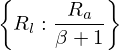

In [13]:
rl = solve(Eq(Rl, Ra/(1+betta)), Rl, dict=1)[0]
rl

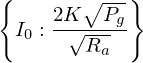

In [14]:
i0 = solve(Eq(K, I0/2*sqrt(Ra/Pg)),I0,dict=1)[0]
i0

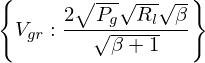

In [15]:
vgr = solve(Eq(Vgr, 2*sqrt(betta/(1+betta))*sqrt(Pg*Rl)),Vgr,dict=1)[0]
vgr

In [16]:
vbr = solve(Eq(Vbr, Rl*I0),Vbr,dict=1)[0]
vbr

## $K$

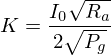

In [17]:
k = Eq(K, I0/2*sqrt(Ra/Pg))
k

In [18]:
knum = k.rhs.evalf(subs={I0:I0num, Ra:Ranum, Pg:Pgnum})
knum

## $\beta$

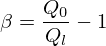

In [19]:
beta = Eq(betta, Q0/Ql-1)
beta

In [20]:
betanum = beta.rhs.evalf(subs={Q0:Q0num, Ql:Qlnum})
betanum

## $V_a$

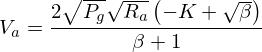

In [21]:
va = Eq(Va, Vgr - Vbr)
va = va.subs(vbr)
va = va.subs(vgr)
va = va.subs(i0)
va = va.subs(rl)
va = va.simplify()
va

In [22]:
vanum = va.rhs.evalf(subs={Pg:Pgnum, Ra:Ranum, betta:betanum, K:knum})
vanum

## $P_{diss}$

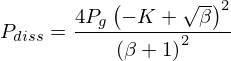

In [23]:
pdiss = Eq(Pdiss, va.rhs**2/Ra)
pdiss

In [24]:
pdissnum = pdiss.rhs.evalf(subs={Pg:Pgnum, betta:betanum, K:knum})
pdissnum

## $W$

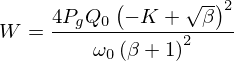

In [25]:
w = Eq(W, pdiss.rhs*Q0/omega0)
w

In [26]:
wnum = w.rhs.evalf(subs={Pg:Pgnum, betta:betanum, K:knum, Q0:Q0num, omega0:omega0num})
wnum

## $I_0 V_a$

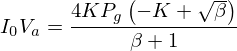

In [27]:
i0va = I0*va.rhs
i0va = i0va.subs(i0)
Eq(I0*Va, i0va)

In [28]:
i0vanum = i0va.evalf(subs={Pg:Pgnum, betta:betanum, K:knum})
i0vanum

## $\eta$

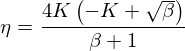

In [29]:
eeta = Eq(eta, I0*va.rhs/Pg)
eeta = eeta.subs(i0)
eeta

In [30]:
eetanum = eeta.rhs.evalf(subs={betta:betanum, K:knum})
eetanum

## $P_{refl}$

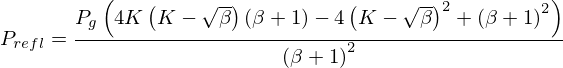

In [31]:
prefl = Eq(Prefl, Pg-pdiss.rhs-I0*va.rhs)
prefl = prefl.subs(i0)
prefl = prefl.simplify()
prefl

In [32]:
preflnum = prefl.rhs.evalf(subs={betta:betanum, K:knum, Pg:Pgnum})
preflnum

# Постоянная времени заполнения структуры

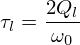

In [33]:
tau = Eq(taul, 2*Ql/omega0)
tau

In [34]:
taunum = tau.rhs.evalf(subs={Ql:Qlnum, omega0:omega0num})
taunum